# Import required libraries and load preprocessed train dataset 

In [1]:
# Load required libraries for eda visulation tasks 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load preprocessed train dataset
data_train_path = './datasets/df_train_preprocessed.csv'
df = pd.read_csv(data_train_path)

# Get preprocessed train dataframe dedicated to fraud observations
df_fraud = df[df.is_fraud==1]

print('Shape for preprocessed train dataset: \n', df.shape)
print('Shape for only-fraud train dataset: \n', df_fraud.shape)

Shape for preprocessed train dataset: 
 (1296675, 33)
Shape for only-fraud train dataset: 
 (7506, 33)


# EDA

## Plot: gender, top-10 cities vs fraud

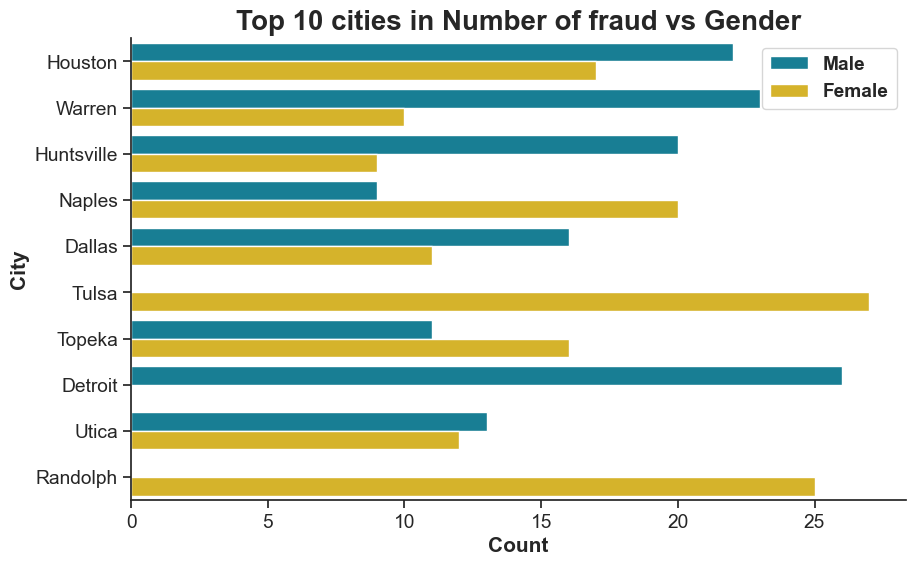

In [2]:
# Create figure object from matplotlib and set figure styles with seaborn methods
fig = plt.figure(figsize=(10,6))
colors = ["#048BA8", "#F1C40F"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Create count plot with 'city' on the y-axis
g = sns.countplot(y = 'city',
                  data=df_fraud, 
                  hue='gender',
                  order=df_fraud.city.value_counts(sort=True, ascending=False).head(10).index)

# Set title, label, legend 
g.set_title('Top 10 cities in Number of fraud vs Gender', fontdict = { 'fontsize': 20, 'fontweight':'bold'})
g.set_xlabel('Count', fontsize=15, fontweight='bold')
g.set_ylabel('City', fontsize=15, fontweight='bold')
g.legend(prop={'weight':'bold'})

# Show plot
plt.show()

# Save as a PNG file with 300 dpi
fig.savefig('./figs/Top 10 cities in Number of fraud vs Gender.png',dpi=300, bbox_inches='tight')

# Countplot for gender vs fraud

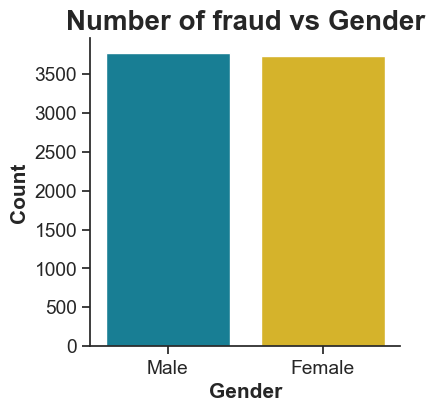

In [3]:
fig = plt.figure(figsize=(4,4))

# Create count plot with region on the y-axis
g = sns.countplot(x = 'gender', data=df_fraud)

# Set title, label, legend 
g.set_title('Number of fraud vs Gender', fontdict = { 'fontsize': 20, 'fontweight':'bold'})
g.set_xlabel('Gender', fontsize=15, fontweight='bold')
g.set_ylabel('Count', fontsize=15, fontweight='bold')

# Show plot
plt.show()

# Save as a PNG file with 300 dpi
fig.savefig('./figs/Number of fraud vs Gender.png',dpi=300, bbox_inches='tight')

# Plot: mean --> % of gender in term of fraud

<Figure size 800x400 with 0 Axes>

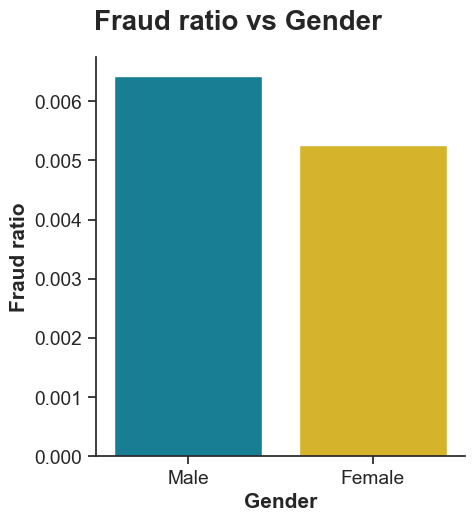

In [4]:
# Creat gender label list
gender_label = ['Male', 'Female']

# Create figure object from matplotlib and set figure styles with seaborn methods
fig = plt.figure(figsize=(8,4))
colors = ["#048BA8", "#F1C40F"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Create bar catplot 
g = sns.catplot(x = 'gender',
                y='is_fraud',
                data=df, 
                kind='bar',
                order=gender_label,
                errorbar=None
               )

# Set title, label, legend 
g.fig.suptitle('Fraud ratio vs Gender', fontsize=20, fontweight='bold', y=1.05)
g.set_xlabels('Gender', fontsize=15, fontweight='bold')
g.set_ylabels('Fraud ratio', fontsize=15, fontweight='bold')

# Show plot
plt.show()

# Save as a PNG file with 300 dpi
g.figure.savefig('./figs/Fraud ratio vs Gender.png',dpi=300, bbox_inches='tight')


# plot category & gender vs fraud

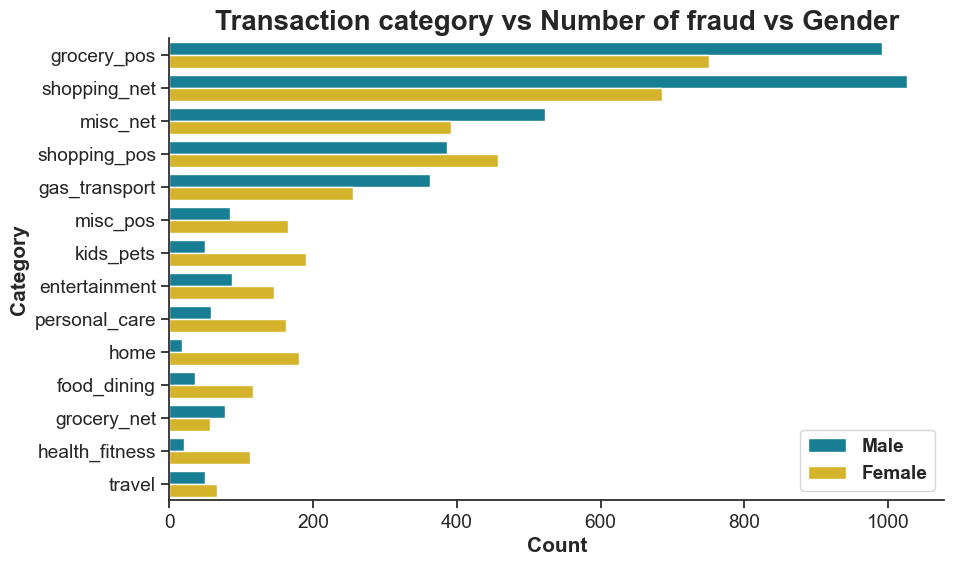

In [5]:
# Create figure object from matplotlib and set figure styles with seaborn methods
fig = plt.figure(figsize=(10,6))
colors = ["#048BA8", "#F1C40F"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Create count plot
g = sns.countplot(y = 'category',
                   data=df_fraud, 
                   hue='gender',
                   order=df_fraud.category.value_counts().index, 
                  )

# Set title, label, legend 
g.set_title('Transaction category vs Number of fraud vs Gender', fontdict = { 'fontsize': 20, 'fontweight':'bold'})
g.set_xlabel('Count', fontsize=15, fontweight='bold')
g.set_ylabel('Category', fontsize=15, fontweight='bold')
g.legend(prop={'weight':'bold'})

# Show plot
plt.show()

# Save as a PNG file with 300 dpi
fig.savefig('./figs/Transaction category vs Number of fraud vs Gender.png',dpi=300, bbox_inches='tight')

In [6]:
df_fraud.age_intervals.unique()

array(['Between 30 and 40', 'Between 50 and 60', 'Larger than 60',
       'Less than 20', 'Between 20 and 30', 'Between 40 and 50'],
      dtype=object)

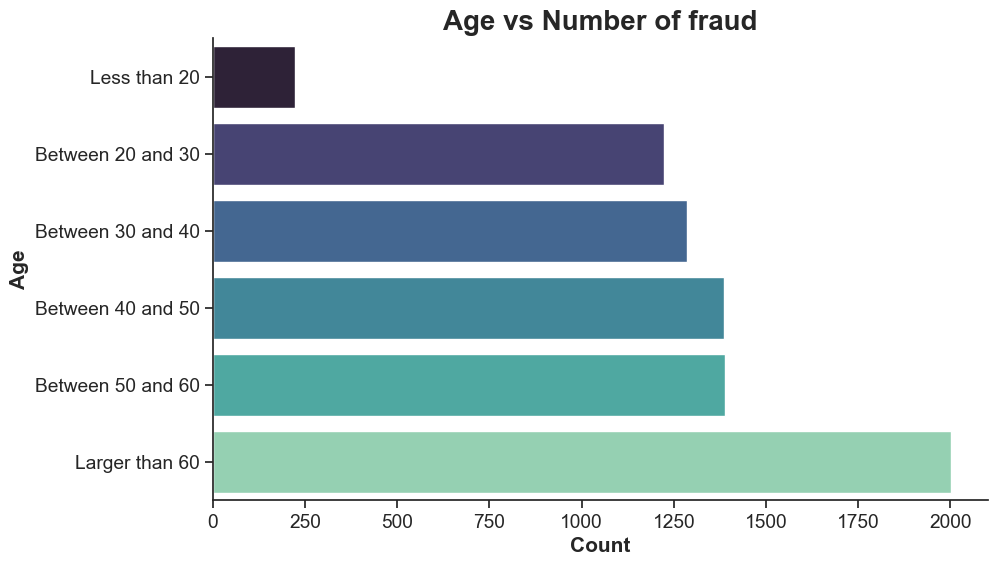

In [7]:
# age order list
age_order = ['Less than 20', 'Between 20 and 30', 'Between 30 and 40', 
             'Between 40 and 50', 'Between 50 and 60', 'Larger than 60',]

# Create figure object from matplotlib and set figure styles with seaborn methods
fig = plt.figure(figsize=(10,6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette("mako"))

# Create count plot with region on the y-axis
g = sns.countplot(y='age_intervals',
              data=df_fraud, 
              order=age_order)

# Set title, label, legend 
g.set_title('Age vs Number of fraud', fontdict = { 'fontsize': 20, 'fontweight':'bold'})
g.set_xlabel('Count', fontsize=15, fontweight='bold')
g.set_ylabel('Age', fontsize=15, fontweight='bold')

# Show plot
plt.show()

# Save as a PNG file with 300 dpi
fig.savefig('./figs/Age vs Number of fraud.png',dpi=300, bbox_inches='tight')

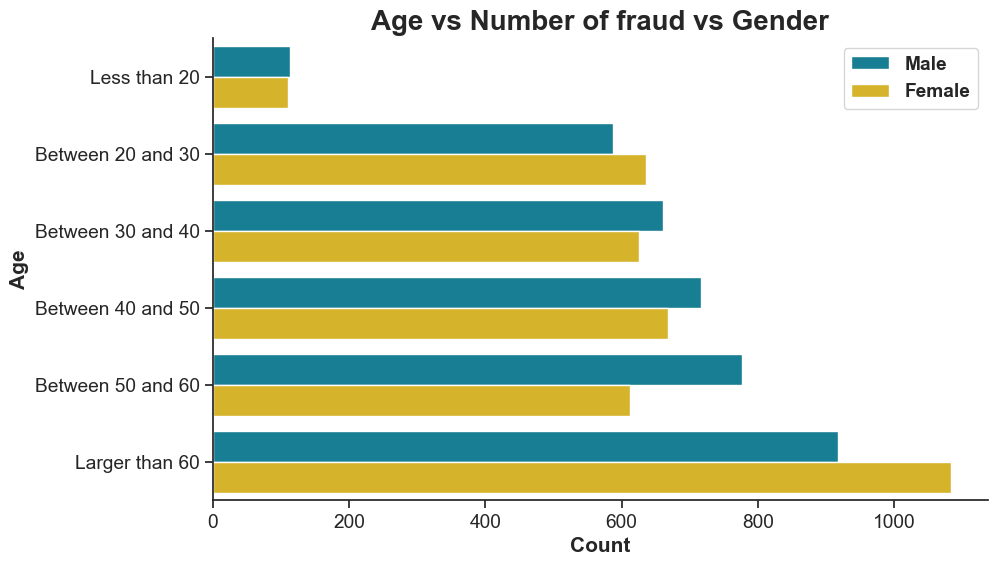

In [8]:
fig = plt.figure(figsize=(10,6))

colors = ["#048BA8", "#F1C40F"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Create count plot with region on the y-axis
g = sns.countplot(y = 'age_intervals',
                   data=df_fraud, 
                   hue='gender',
                   order=age_order)

# Set title, label, legend 
g.set_title('Age vs Number of fraud vs Gender', fontdict = { 'fontsize': 20, 'fontweight':'bold'})
g.set_xlabel('Count', fontsize=15, fontweight='bold')
g.set_ylabel('Age', fontsize=15, fontweight='bold')
g.legend(prop={'weight':'bold'})

# Show plot
plt.show()

# Save as a PNG file with 300 dpi
fig.savefig('./figs/Age vs Number of fraud vs Gender.png',dpi=300, bbox_inches='tight')

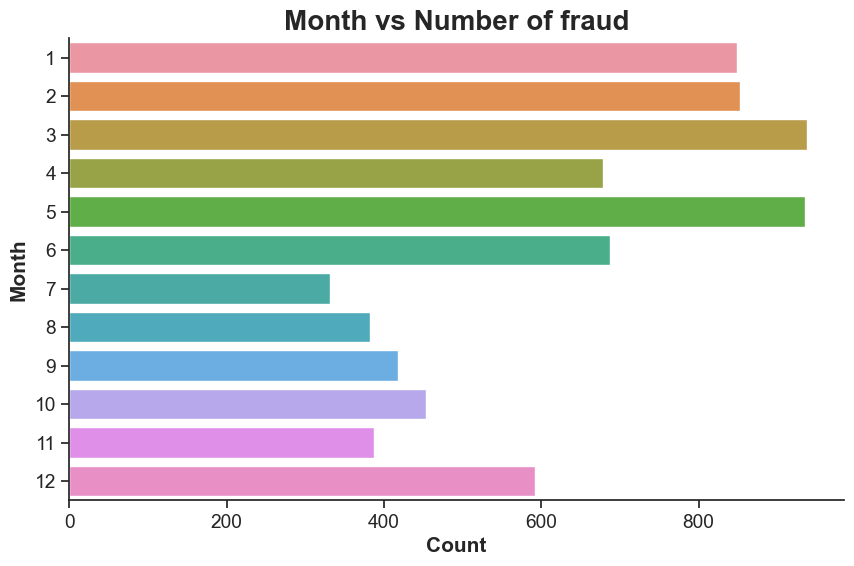

In [9]:
# Create figure object from matplotlib and set figure styles with seaborn methods
fig = plt.figure(figsize=(10,6))
colors = ["#048BA8", "#F1C40F"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Create count plot 
g = sns.countplot(y = 'transaction_month',
              data=df_fraud, 
#               hue='gender'
                  )

# Set title, label, legend 
g.set_title('Month vs Number of fraud', fontdict = { 'fontsize': 20, 'fontweight':'bold'})
g.set_xlabel('Count', fontsize=15, fontweight='bold')
g.set_ylabel('Month', fontsize=15, fontweight='bold')
# sb.legend(prop={'weight':'bold'})

# Show plot
plt.show()

# Save as a PNG file with 300 dpi
fig.savefig('./figs/Month vs Number of fraud.png',dpi=300, bbox_inches='tight')

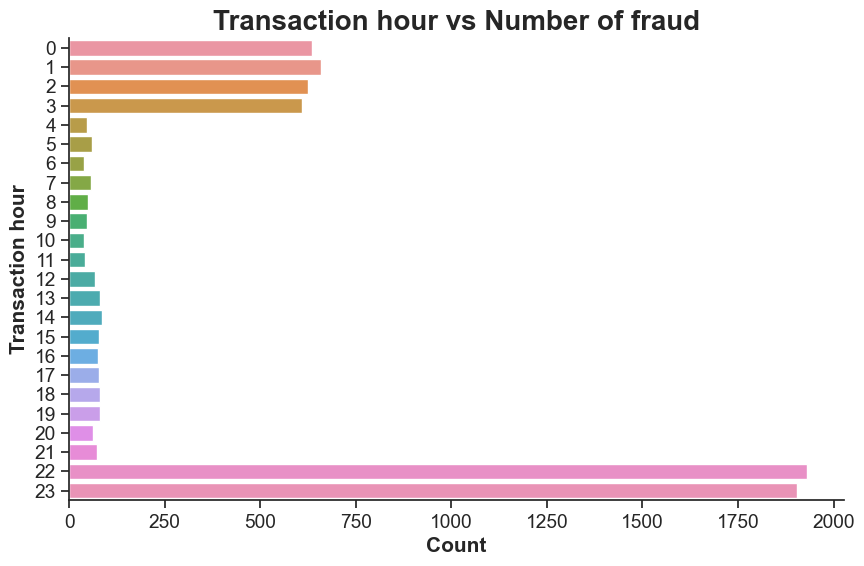

In [10]:
# Create figure object from matplotlib and set figure styles with seaborn methods
fig = plt.figure(figsize=(10,6))

colors = ["#048BA8", "#F1C40F"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Create count plot 
g = sns.countplot(y = 'transaction_hour',
                   data=df_fraud,
                   order=sorted(df_fraud.transaction_hour.value_counts().index)
#               hue='gender'
                  )

# Set title, label, legend 
g.set_title('Transaction hour vs Number of fraud', fontdict = { 'fontsize': 20, 'fontweight':'bold'})
g.set_xlabel('Count', fontsize=15, fontweight='bold')
g.set_ylabel('Transaction hour', fontsize=15, fontweight='bold')
# sb.legend(prop={'weight':'bold'})

# Show plot
plt.show()

# Save as a PNG file with 300 dpi
fig.savefig('./figs/Transaction hour vs Number of fraud.png',dpi=300, bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

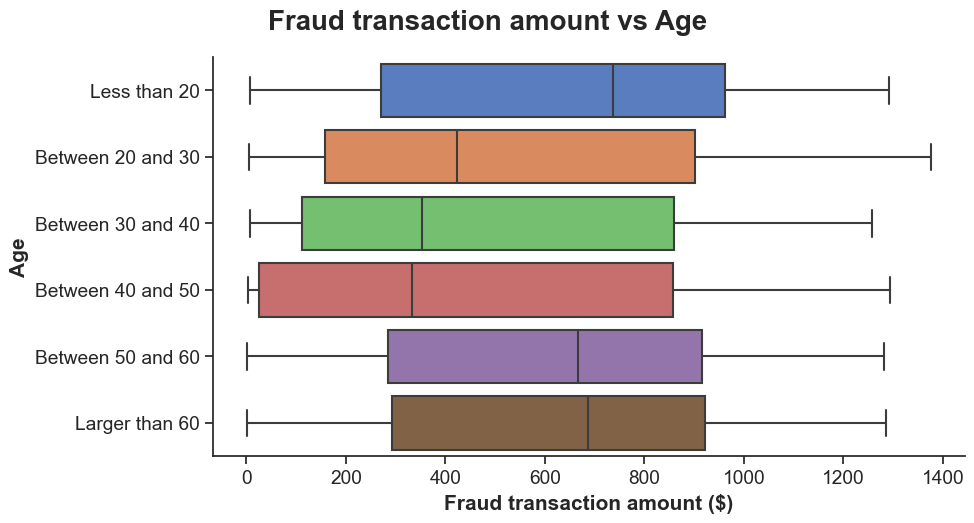

In [11]:
# Create figure object from matplotlib and set figure styles with seaborn methods
fig = plt.figure(figsize=(10,6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette("muted"))

# Create catplot seavirb for boxplot
g = sns.catplot(y = 'age_intervals',
                x = "transaction_amount",
                data=df_fraud, 
                order=age_order,
                kind='box', 
                aspect=2)

g.fig.suptitle('Fraud transaction amount vs Age', fontsize=20, fontweight='bold', y=1.05)
g.set_xlabels('Fraud transaction amount ($)', fontsize=15, fontweight='bold')
g.set_ylabels('Age', fontsize=15, fontweight='bold')
# sb.set(xticks=[0, 250, 500, 750, 1000, 1500])

# Show plot
plt.show()

g.figure.savefig('./figs/Fraud transaction amount vs Age.png',dpi=300, bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

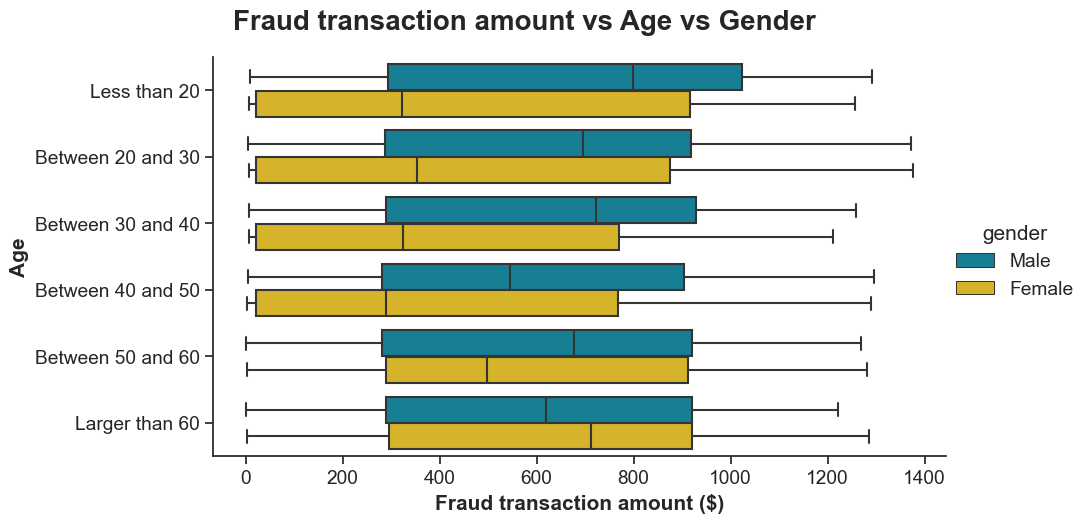

In [12]:
# Create figure object from matplotlib and set figure styles with seaborn methods
plt.figure(figsize=(10,6))
colors = ["#048BA8", "#F1C40F"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Create boxplot with catplot seaborn
g = sns.catplot(y = 'age_intervals',
                x = "transaction_amount",
                data=df_fraud, 
                hue='gender',
                order=age_order,
                kind='box', aspect=2)

# Set title, label, legend 
g.fig.suptitle('Fraud transaction amount vs Age vs Gender', fontsize=20, fontweight='bold', y=1.05)
g.set_xlabels('Fraud transaction amount ($)', fontsize=15, fontweight='bold')
g.set_ylabels('Age', fontsize=15, fontweight='bold')

# Show plot
plt.show()

g.figure.savefig('./figs/Fraud transaction amount vs Age vs Gender.png',dpi=300, bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

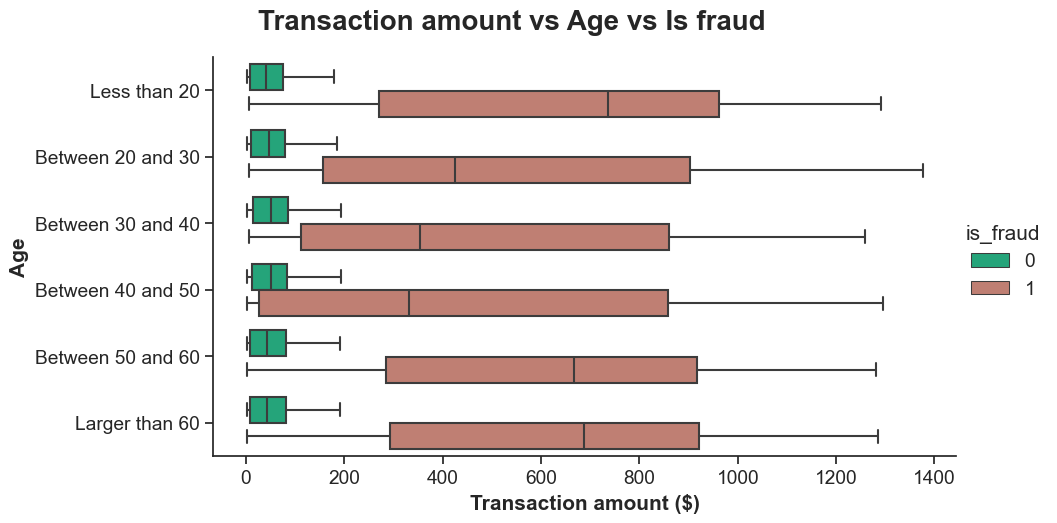

In [13]:
# Create figure object from matplotlib and set figure styles with seaborn methods
plt.figure(figsize=(10,6))

colors = ["#10B981", '#CC7666']

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(colors)

# Create boxplot with catplot seabborn
g = sns.catplot(y = 'age_intervals',
                x = "transaction_amount",
                data=df, 
                hue='is_fraud',
                order=age_order,
                kind='box',
                sym='', 
                aspect=2
           );
# Set title, label, legend 
g.fig.suptitle('Transaction amount vs Age vs Is fraud', fontsize=20, fontweight='bold', y=1.05)
g.set_xlabels('Transaction amount ($)', fontsize=15, fontweight='bold')
g.set_ylabels('Age', fontsize=15, fontweight='bold')

# Show plot
plt.show();

g.figure.savefig('./figs/Transaction amount vs Age vs Is fraud.png',dpi=300, bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

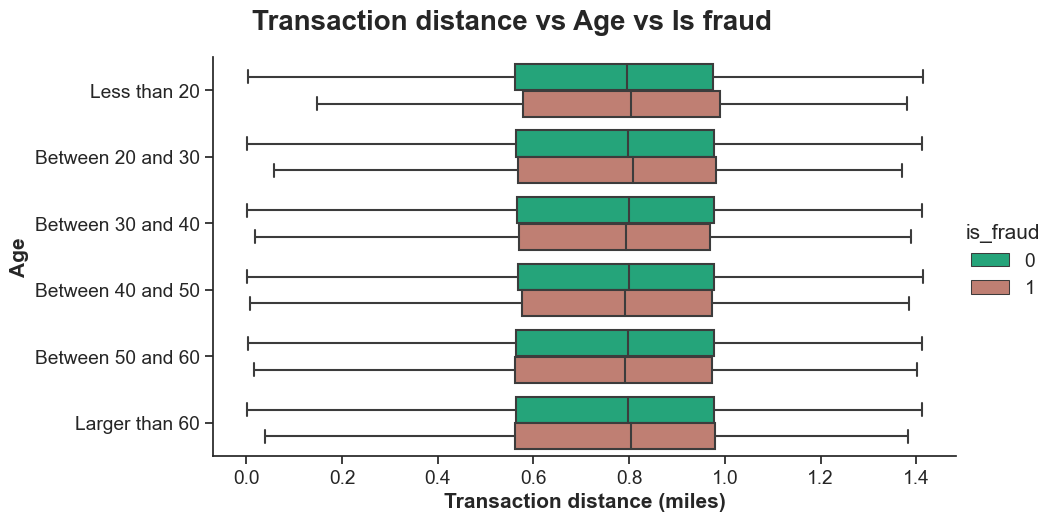

In [14]:
# Set figure
plt.figure(figsize=(10,6))

colors = ["#10B981", '#CC7666']

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(colors)

# Create count plot with region on the y-axis
g = sns.catplot(y = 'age_intervals',
            x = "transaction_distance",
            data=df, 
            hue='is_fraud',
            order=age_order,
            kind='box',
            sym='', 
            aspect=2)

# Set title, label, legend 
g.fig.suptitle('Transaction distance vs Age vs Is fraud', fontsize=20, fontweight='bold', y=1.05)
g.set_xlabels('Transaction distance (miles)', fontsize=15, fontweight='bold')
g.set_ylabels('Age', fontsize=15, fontweight='bold')

# Show plot
plt.show()

g.figure.savefig('./figs/Transaction distance vs Age vs Is fraud.png',dpi=300, bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

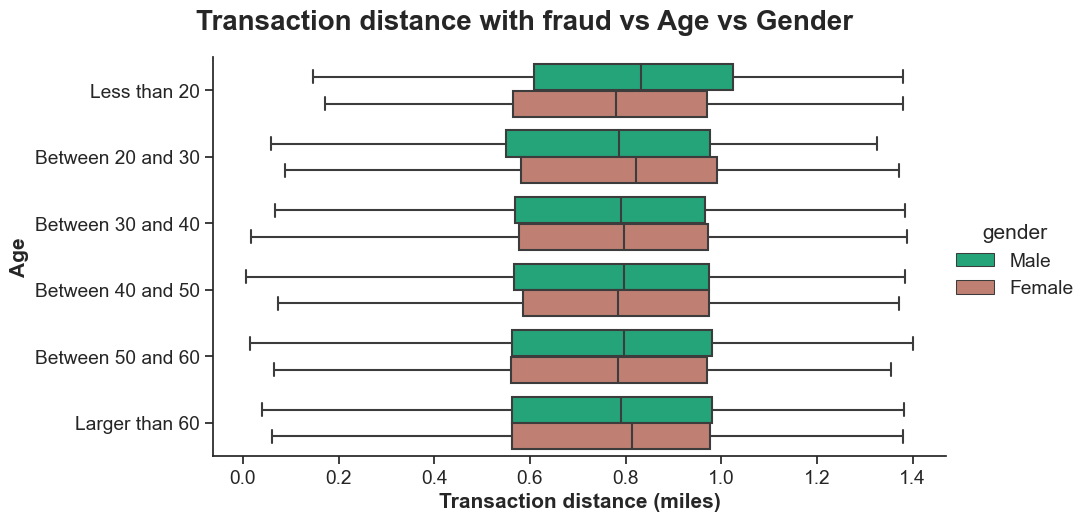

In [15]:
# Set figure
plt.figure(figsize=(10,6))

colors = ["#10B981", '#CC7666']

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(colors)


# Create count plot with region on the y-axis
g = sns.catplot(y = 'age_intervals',
                x = "transaction_distance",
                data=df_fraud, 
                hue='gender',
                order=age_order,
                kind='box',
                sym='',
                aspect=2
           )

# Set title, label, legend 
g.fig.suptitle('Transaction distance with fraud vs Age vs Gender', fontsize=20, fontweight='bold', y=1.05)
g.set_xlabels('Transaction distance (miles)', fontsize=15, fontweight='bold')
g.set_ylabels('Age', fontsize=15, fontweight='bold')

# Show plot
plt.show()

g.figure.savefig('./figs/Transaction distance with fraud vs Age vs Gender.png',dpi=300, bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

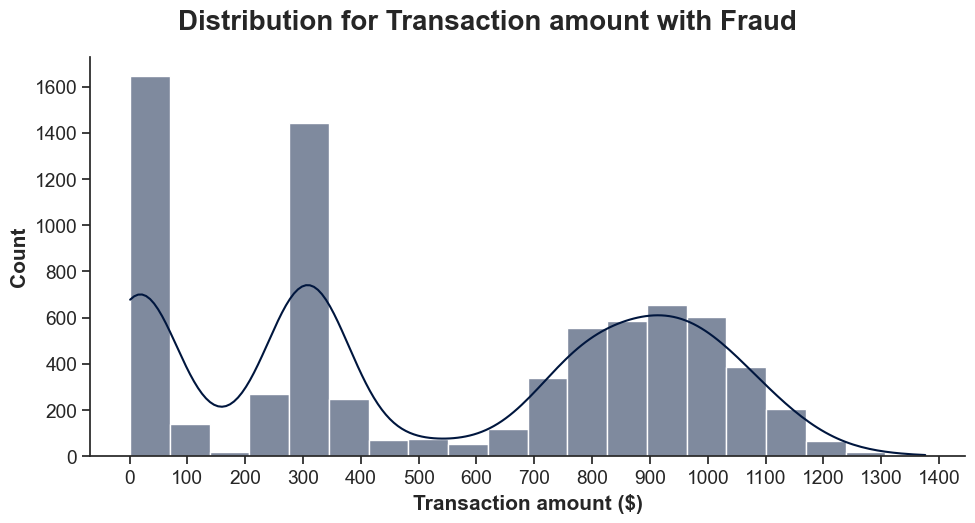

In [16]:
# Set the default seaborn style
plt.figure(figsize=(10,6))

colors = ['#00163E']

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(colors)

# Create a distplot
g = sns.displot(df_fraud['transaction_amount'],
                kde=True,
                bins=20, 
                aspect=2)

# Set title, label, legend 
g.fig.suptitle('Distribution for Transaction amount with Fraud', fontsize=20, fontweight='bold', y=1.05)
g.set_xlabels('Transaction amount ($)', fontsize=15, fontweight='bold')
g.set_ylabels('Count', fontsize=15, fontweight='bold')
g.set(xticks=list(np.arange(0, 1401,100)))

# Show plot
plt.show()

g.figure.savefig('./figs/Distribution for Transaction amount with Fraud.png',dpi=300, bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

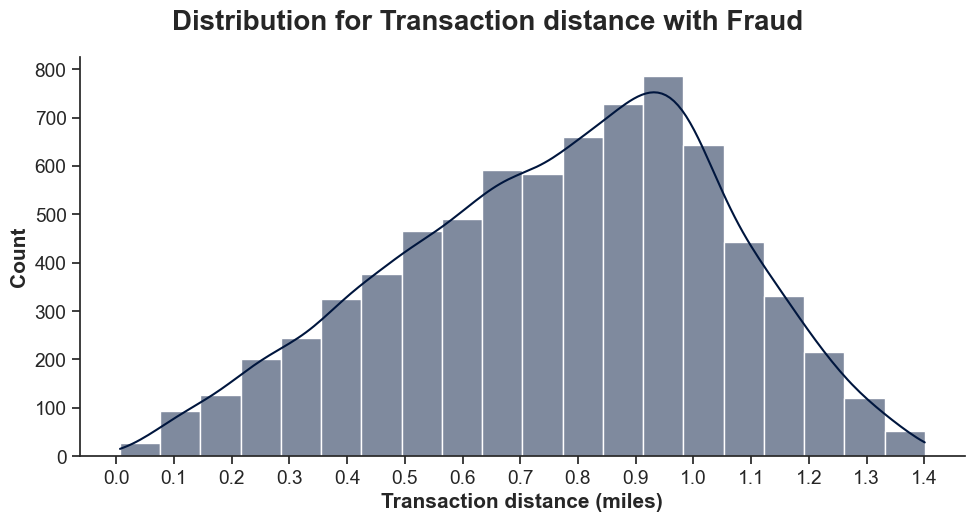

In [17]:
# Set seaborn style
plt.figure(figsize=(10,6))

colors = ['#00163E']

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(colors)

# Create a distplot
g = sns.displot(df_fraud['transaction_distance'],
                kde=True,
                bins=20, 
                aspect=2)

# Set title, label, legend 
g.fig.suptitle('Distribution for Transaction distance with Fraud', fontsize=20, fontweight='bold', y=1.05)
g.set_xlabels('Transaction distance (miles)', fontsize=15, fontweight='bold')
g.set_ylabels('Count', fontsize=15, fontweight='bold')
g.set(xticks=list(np.arange(0, 1.41, 0.1)))

# Show plot
plt.show()

g.figure.savefig('./figs/Distribution for Transaction distance with Fraud.png',dpi=300, bbox_inches='tight')


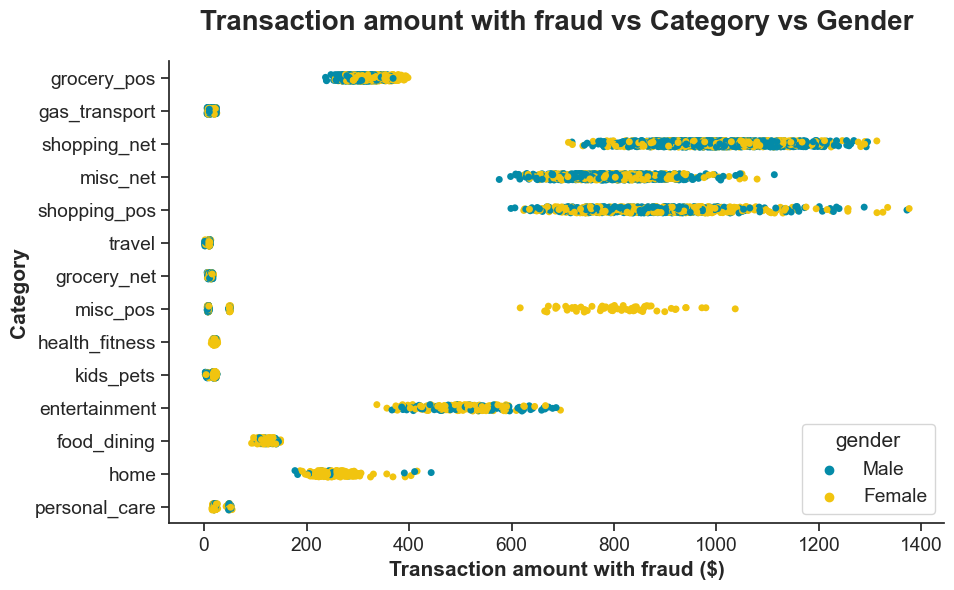

In [18]:
plt.figure(figsize=(10,6))

colors = ["#048BA8", "#F1C40F"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Create stripplot
g = sns.stripplot(data=df_fraud,
                  x='transaction_amount',
                  y='category',
                  hue='gender',
                  jitter=True)

# Set title, label, legend 
g.set_title('Transaction amount with fraud vs Category vs Gender', fontsize=20, fontweight='bold', y=1.05)
g.set_xlabel('Transaction amount with fraud ($)', fontsize=15, fontweight='bold')
g.set_ylabel('Category', fontsize=15, fontweight='bold')

# Show plot
plt.show()

g.figure.savefig('./figs/Transaction amount with fraud vs Category vs Gender.png',dpi=300, bbox_inches='tight')

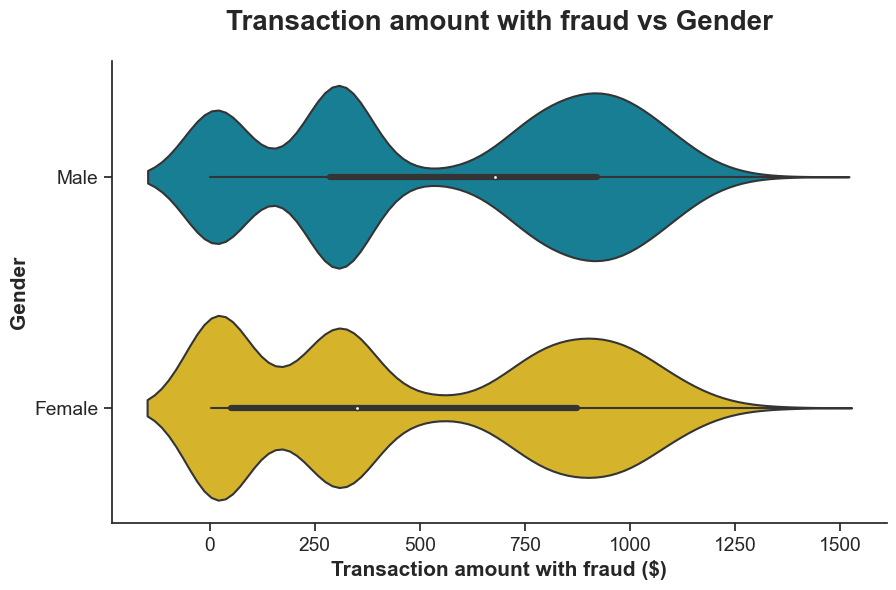

In [19]:
plt.figure(figsize=(10,6))

colors = ["#048BA8", "#F1C40F"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Create the violinplot
g = sns.violinplot(data=df_fraud,
                   x='transaction_amount',
                   y='gender',
#               palette='husl'
             )

# Set title, label, legend 
g.set_title('Transaction amount with fraud vs Gender', fontsize=20, fontweight='bold', y=1.05)
g.set_xlabel('Transaction amount with fraud ($)', fontsize=15, fontweight='bold')
g.set_ylabel('Gender', fontsize=15, fontweight='bold')

plt.show()

g.figure.savefig('./figs/Transaction amount with fraud vs Gender.png',dpi=300, bbox_inches='tight')

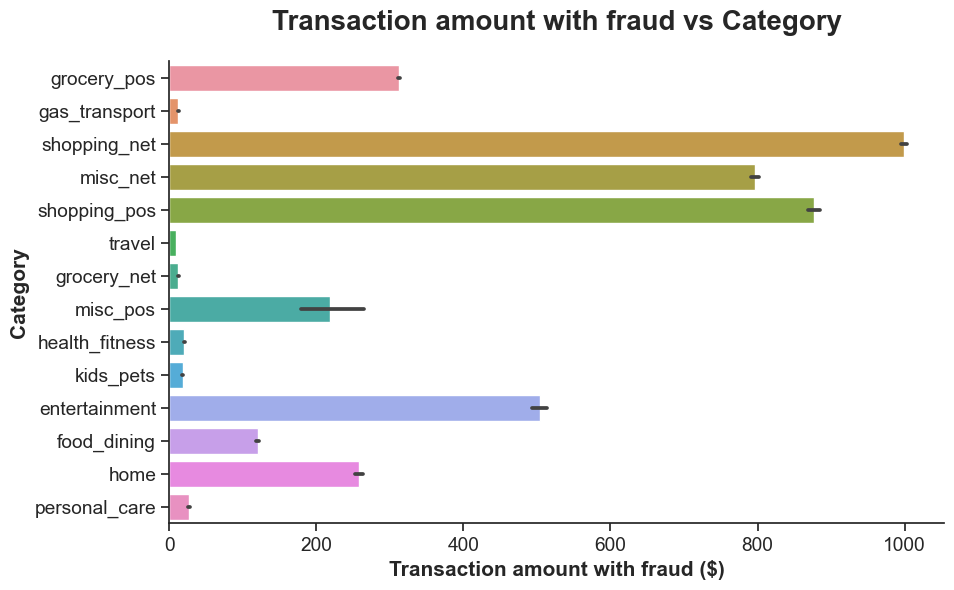

In [20]:
plt.figure(figsize=(10,6))

# colors = ["#048BA8", "#F1C40F"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette('rocket')

# Create the barplot
g = sns.barplot(data=df_fraud,
                x='transaction_amount',
                y='category', 
#               palette='husl'

             )

# Set title, label, legend 
g.set_title('Transaction amount with fraud vs Category', fontsize=20, fontweight='bold', y=1.05)
g.set_xlabel('Transaction amount with fraud ($)', fontsize=15, fontweight='bold')
g.set_ylabel('Category', fontsize=15, fontweight='bold')

plt.show()

g.figure.savefig('./figs/Transaction amount with fraud vs Category.png',dpi=300, bbox_inches='tight')

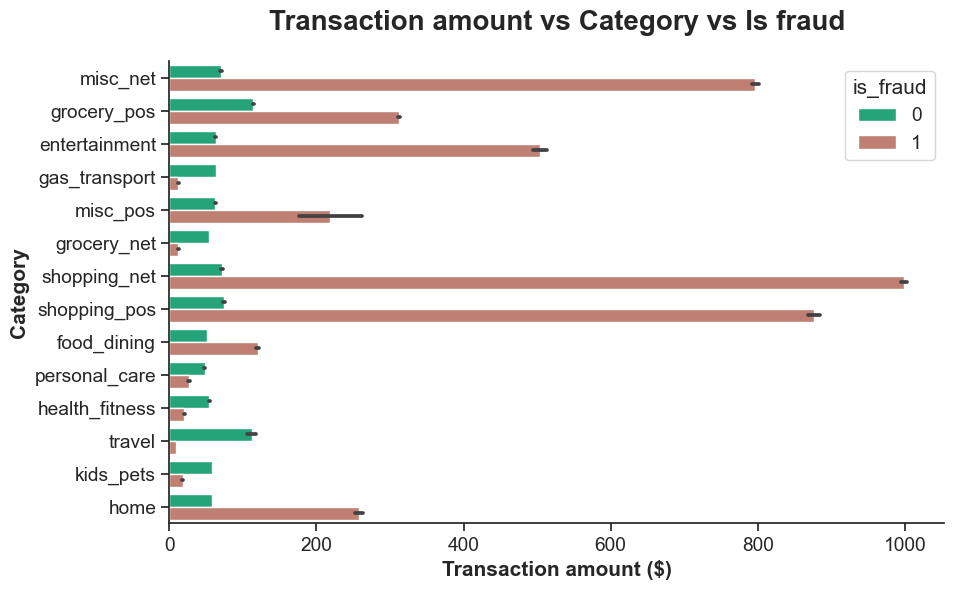

In [21]:
# Create figure object from matplotlib and set figure styles with seaborn methods
plt.figure(figsize=(10,6))
colors = ["#10B981", '#CC7666']
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(colors)

# Create the barplot
g = sns.barplot(data=df,
                x='transaction_amount',
                y='category', 
                hue='is_fraud'
#               palette='husl'

             )

# Set title, label, legend 
g.set_title('Transaction amount vs Category vs Is fraud', fontsize=20, fontweight='bold', y=1.05)
g.set_xlabel('Transaction amount ($)', fontsize=15, fontweight='bold')
g.set_ylabel('Category', fontsize=15, fontweight='bold')

# Show figure
plt.show()

# Save figure
g.figure.savefig('./figs/Transaction amount vs Category vs Is fraud.png',dpi=300, bbox_inches='tight')

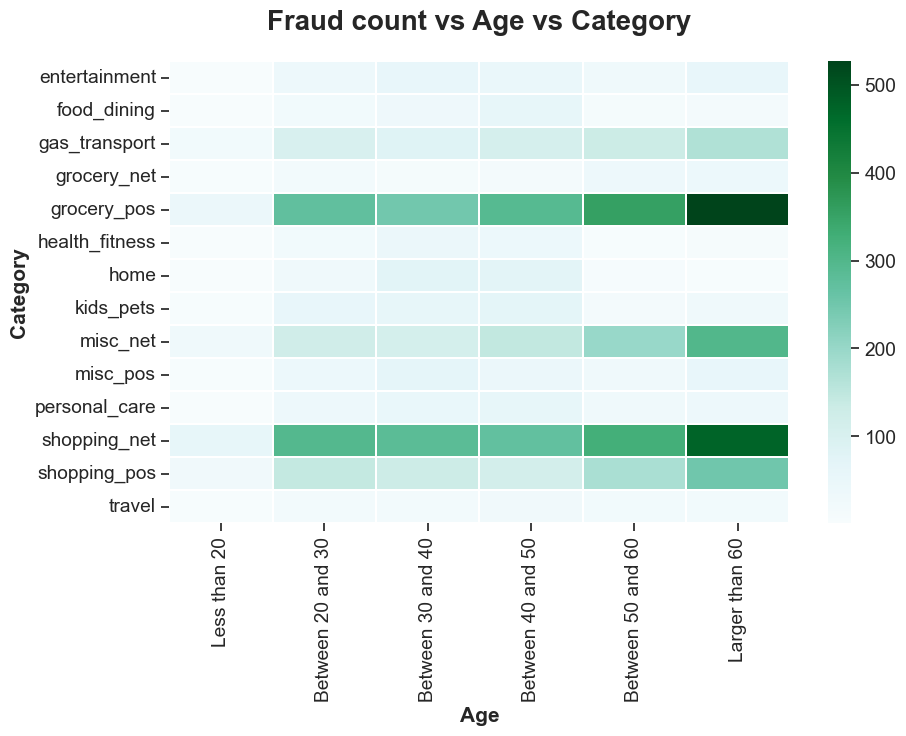

In [22]:
# age order list
age_order = ['Less than 20', 'Between 20 and 30', 'Between 30 and 40', 
             'Between 40 and 50', 'Between 50 and 60', 'Larger than 60',]

# Create a crosstab table of the data
pd_crosstab = pd.crosstab(df_fraud["category"], df_fraud["age_intervals"])
pd_crosstab_ordered = pd_crosstab[age_order]
pd_crosstab_ordered.columns

# Create figure object from matplotlib and set figure styles with seaborn methods
plt.figure(figsize=(10,6))
colors = ["#048BA8", "#F1C40F"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Plot a heatmap of the table
g = sns.heatmap(pd_crosstab_ordered, 
                cbar=True, 
                cmap="BuGn", 
                linewidths=0.3)

# Set title, label, legend 
g.set_title('Fraud count vs Age vs Category', fontsize=20, fontweight='bold', y=1.05)
g.set_xlabel('Age', fontsize=15, fontweight='bold')
g.set_ylabel('Category', fontsize=15, fontweight='bold')

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()
g.figure.savefig('./figs/Fraud count vs Age vs Category.png',dpi=300, bbox_inches='tight')

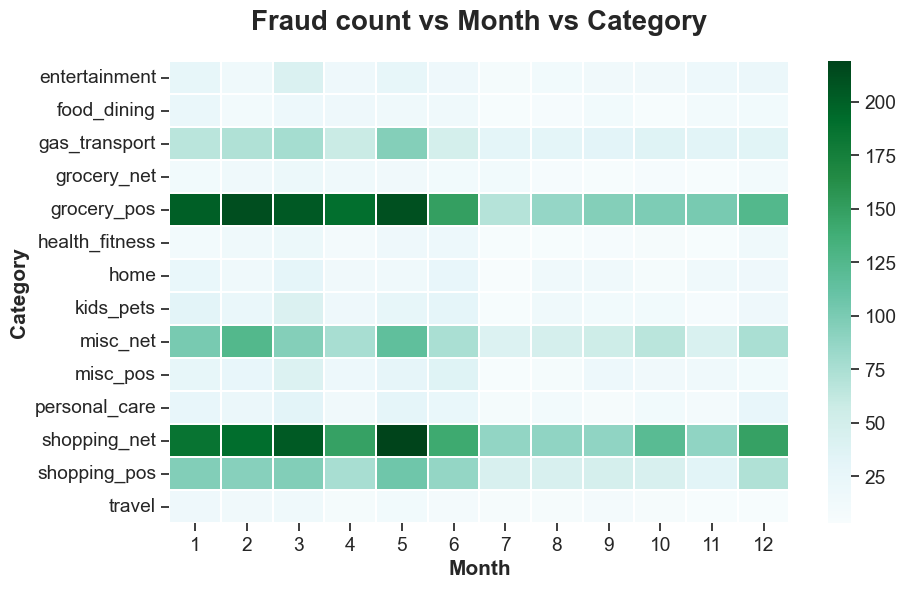

In [23]:
# Create a crosstab table of the data
pd_crosstab_month_cat = pd.crosstab(df_fraud["category"], df_fraud["transaction_month"])
pd_crosstab_month_cat

# Create figure object from matplotlib and set figure styles with seaborn methods
plt.figure(figsize=(10,6))

colors = ["#048BA8", "#F1C40F"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Plot a heatmap of the table
g = sns.heatmap(pd_crosstab_month_cat, 
                cbar=True, 
                cmap="BuGn", 
                linewidths=0.3)

# Set title, label, legend 
g.set_title('Fraud count vs Month vs Category', fontsize=20, fontweight='bold', y=1.05)
g.set_xlabel('Month', fontsize=15, fontweight='bold')
g.set_ylabel('Category', fontsize=15, fontweight='bold')

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=0)

plt.show()
g.figure.savefig('./figs/Fraud count vs Month vs Category.png',dpi=300, bbox_inches='tight')

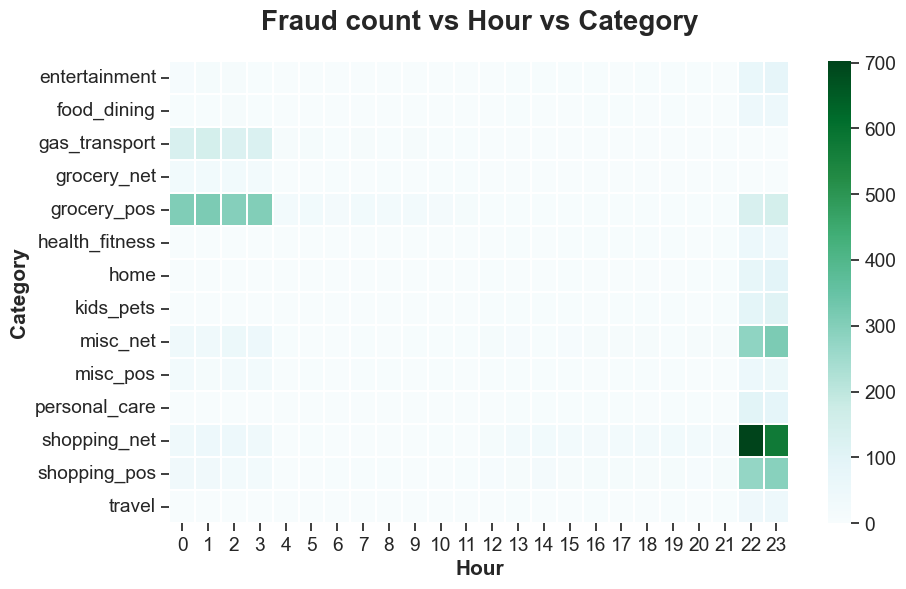

In [24]:
# Create a crosstab table of the data
pd_crosstab_hour_cat = pd.crosstab(df_fraud["category"], df_fraud["transaction_hour"])
pd_crosstab_hour_cat

# Create figure object from matplotlib and set figure styles with seaborn methods
plt.figure(figsize=(10,6))

colors = ["#048BA8", "#F1C40F"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Plot a heatmap of the table
g = sns.heatmap(pd_crosstab_hour_cat, 
                cbar=True, 
                cmap="BuGn", 
                linewidths=0.3)

# Set title, label, legend 
g.set_title('Fraud count vs Hour vs Category', fontsize=20, fontweight='bold', y=1.05)
g.set_xlabel('Hour', fontsize=15, fontweight='bold')
g.set_ylabel('Category', fontsize=15, fontweight='bold')

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=0)

# show plot
plt.show()
# save figure
g.figure.savefig('./figs/Fraud count vs Hour vs Category.png',dpi=300, bbox_inches='tight')

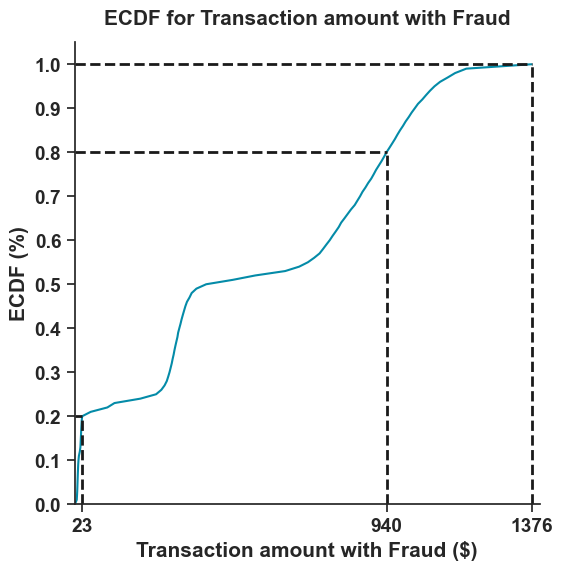

In [25]:
# Create new dataframe for quantile
df_quantile = df_fraud.sort_values('transaction_amount', ascending=True)
percentage_list = np.arange(0,1.01,0.01)

# Get quantile values from transaction_amount feature
amount_quantile = df_quantile.transaction_amount.quantile(percentage_list)

# Create datafrale fir ecdf
df_ecdf = pd.DataFrame({"amount_quantile": amount_quantile, "percentage_list":percentage_list}, index=percentage_list)

# set figure
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(df_ecdf.amount_quantile, df_ecdf.percentage_list)

# get quantile at specific percentage
quantile_20 = df_ecdf.loc[0.20, 'amount_quantile']
quantile_80 = df_ecdf.loc[0.80, 'amount_quantile']
quantile_100 = df_ecdf.loc[1.0, 'amount_quantile']

# create horizontal and vertical line
ax.hlines([0.20], xmin=0, xmax=quantile_20, linestyles='--', color='k', linewidth=2)
ax.vlines([quantile_20], ymin=0, ymax=0.20, linestyles='--', color='k', linewidth=2)

ax.vlines([quantile_80], ymin=0, ymax=0.8, linestyles='--', color='k', linewidth=2)
ax.hlines([0.80], xmin=0, xmax=quantile_80, linestyles='--', color='k', linewidth=2)


ax.vlines([quantile_100], ymin=0, ymax=1.0, linestyles='--', color='k', linewidth=2)
ax.hlines([1.0], xmin=0, xmax=quantile_100, linestyles='--', color='k', linewidth=2)


ax.set_yticks(np.arange(0, 1.1, step=0.1), weight = 'bold')
ax.set_xticks([quantile_20, quantile_80, quantile_100], 
              labels=[str(round(quantile_20)), str(round(quantile_80)), str(round(quantile_100))], 
#               rotation=20, 
              weight = 'bold')

# Add more attributes
ax.set_ylim([0,1.05])
ax.set_xlim([0,1400])
ax.set_xlabel('Transaction amount with Fraud ($)', weight = 'bold', fontsize=15)
ax.set_ylabel('ECDF (%)',weight = 'bold', fontsize=15)
ax.set_title("ECDF for Transaction amount with Fraud", weight = 'bold', fontsize=15, y=1.02)
plt.yticks(weight = 'bold')
plt.xticks(weight = 'bold')

# plt.legend()
plt.show()

# Save as a PNG file with 300 dpi
fig.savefig('./figs/ECDF for Transaction amount with Fraud.png',dpi=300, bbox_inches='tight')

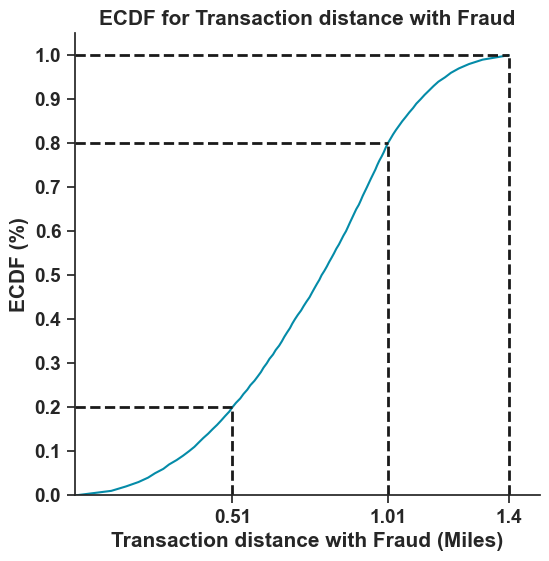

In [26]:
df_quantile_distance = df_fraud.sort_values('transaction_distance', ascending=True)
percentage_list = np.arange(0,1.01,0.01)

distance_quantile = df_quantile_distance.transaction_distance.quantile(percentage_list)

df_ecdf_distannce = pd.DataFrame({"distance_quantile": distance_quantile, "percentage_list":percentage_list}, index=percentage_list)

fig, ax = plt.subplots(figsize=(6,6))

ax.plot(df_ecdf_distannce.distance_quantile, df_ecdf_distannce.percentage_list)

quantile_20 = df_ecdf_distannce.loc[0.20, 'distance_quantile']
quantile_80 = df_ecdf_distannce.loc[0.80, 'distance_quantile']
quantile_100 = df_ecdf_distannce.loc[1.0, 'distance_quantile']

ax.hlines([0.20], xmin=0, xmax=quantile_20, linestyles='--', color='k', linewidth=2)
ax.vlines([quantile_20], ymin=0, ymax=0.20, linestyles='--', color='k', linewidth=2)

ax.vlines([quantile_80], ymin=0, ymax=0.8, linestyles='--', color='k', linewidth=2)
ax.hlines([0.80], xmin=0, xmax=quantile_80, linestyles='--', color='k', linewidth=2)


ax.vlines([quantile_100], ymin=0, ymax=1.0, linestyles='--', color='k', linewidth=2)
ax.hlines([1.0], xmin=0, xmax=quantile_100, linestyles='--', color='k', linewidth=2)

ax.set_yticks(np.arange(0, 1.1, step=0.1), weight = 'bold')
ax.set_xticks([quantile_20, quantile_80, quantile_100], 
              labels=[str(round(quantile_20,2)), str(round(quantile_80,2)), str(round(quantile_100,2))], 
              weight = 'bold')


ax.set_ylim([0,1.05])
ax.set_xlim([0,1.5])
ax.set_xlabel('Transaction distance with Fraud (Miles)', weight = 'bold', fontsize=15)
ax.set_ylabel('ECDF (%)',weight = 'bold', fontsize=15)
ax.set_title("ECDF for Transaction distance with Fraud", weight = 'bold', fontsize=15)
plt.yticks(weight = 'bold')
plt.xticks(weight = 'bold')

# plt.legend()
plt.show()

# Save as a PNG file with 300 dpi
fig.savefig('./figs/ECDF for Transaction distance with Fraud.png',dpi=300, bbox_inches='tight')